# Define ML Problems

**import libraries**

In [102]:
import pandas as pd
import numpy as np

from sklearn import datasets, metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

import plotly.express as px

### Considering the Target

- if the classes are balanced
- the appropriate type of encoding to use
- and how that choice might affect the model

in the case of the austrailian weather dataset we will make our target 'RainTomorrow'

In [72]:
df = pd.read_csv('data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [74]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

**The target is relitivle imbalanced**

In [75]:
df['RainTomorrow'].value_counts(normalize=True)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

**Leaky Features**

- features that won't be available before calculating target
- an example is if a patient is taking blood clout medicine (true or false) its possible that this feature is changed or modifed once it is know that someone has heart disease.

**Leaky Testing Process**

- when doing preprocessing it is possible to accidently leak info about the testing data to the validation data. it is important to seperate the data before preprocessing to avoid this problem


**Exploring leaky data in the AUS weather dataset**

- look for features to be used
- look at each of those features in more detail

In [76]:
# categorial varibles
df.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2014-06-10,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [77]:
# statistics of the numerical data
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**Data Exploration: Null Values**

In [78]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**using custom code to visualize missing values in columns**

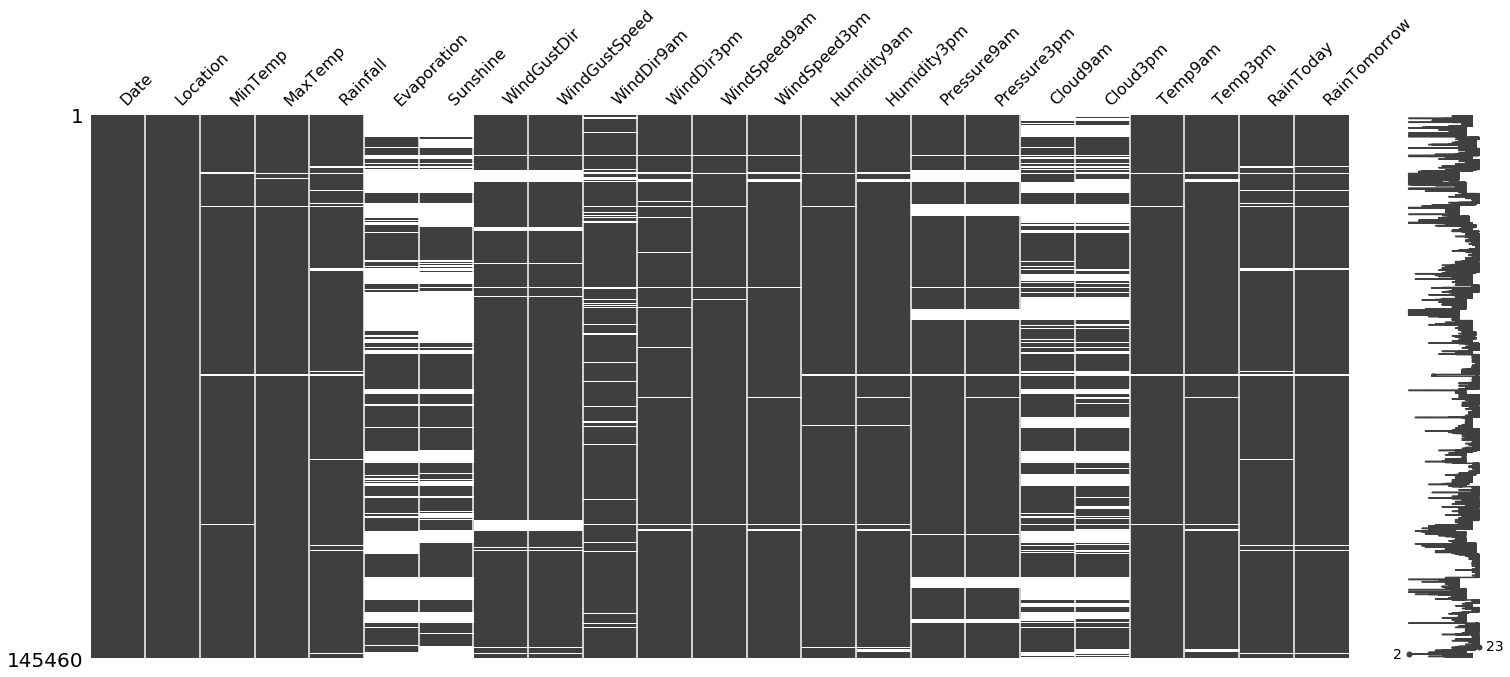

In [79]:
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df)

In [80]:
# Dropping columns with high precentage of missing values
cols_drop = ['Location', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
df = df.drop(cols_drop, axis=1)

**Data Cleaning: Datetime**

- using only month to not be too specific

In [81]:
df['Data'] = pd.to_datetime(df['Date'], infer_datetime_format=True).dt.month
df.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Data
0,2008-12-01,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12
1,2008-12-02,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12
2,2008-12-03,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12
3,2008-12-04,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12
4,2008-12-05,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12


**Data Processing: Pipeline**

We'll separate our features into numeric and categorical types

**Numeric Features**

As some of the numeric features are on very different scales, we'll want to standardize. We will still have missing values which SimpleImputer() will take care of.

**Categorical Features**

These features will need to be encoded. Because of the high cardinality of the Location column we'll use the LabelEncoder() separately (it doesn't accept more than one column at a time and can't be used in the pipeline).

In [82]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Data'],
      dtype='object')

In [90]:
# Define the numeric features
numeric_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 
                    'WindSpeed9am','WindSpeed3pm', 'Humidity9am', 
                    'Humidity3pm', 'Pressure9am','Pressure3pm', 
                    'Temp9am', 'Temp3pm']

# Transfromer (imput, scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define the categorical features
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder())])

# Defining how the numeric and categorical features will be transformed
preprocesser = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Defining the pipeline steps as well as the classifer
clf = Pipeline(steps=[
    ('preprocesser', preprocesser),
    ('classifer', DecisionTreeClassifier())])

**Strategy for filling in the missing values in the target array**

- tried finding the most similar rows and taking value from that. worked in theroy but took too long to iterate through entire dataframe. if a more optimal method can e found should work
- for now just dropped all rows with nan values in the target feature

In [91]:
df['RainTomorrow'].isnull().sum()

0

In [92]:
df = df[df['RainTomorrow'].notna()]
df['RainTomorrow'].isnull().sum()

0

**Create Feature Matrix, Target Array**

In [93]:
# Feature Matrix
X = df.drop('RainTomorrow', axis=1)

# Target array and encoding
label_enc = LabelEncoder()
y = label_enc.fit_transform(df['RainTomorrow'])

**Creating train and test sets**

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

**Fit the model**

In [95]:
clf.fit(X_train, y_train)
print('Validation Accuracy: ', clf.score(X_test, y_test))

Validation Accuracy:  0.7780864306058581


**Look at feature importance**

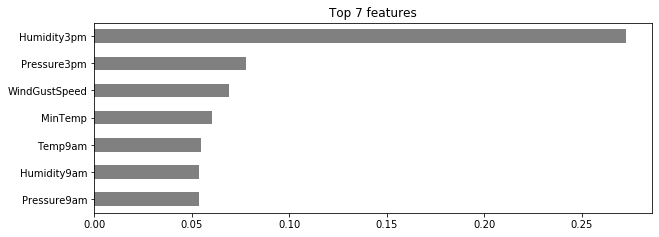

In [97]:
# Features (order in which they were preprocessed)
features_order = numeric_features + categorical_features

# Determine the importances
importances = pd.Series(clf.steps[1][1].feature_importances_, features_order)

# Plot feature importances
import matplotlib.pyplot as plt

n = 7
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey')

### Choosing evaluating metrics and models

**Classification & regression metrics are different!**

- Don’t use regression metrics to evaluate classification tasks.
- Don’t use classification metrics to evaluate regression tasks.

**Classification Tasks**

For classification tasks we have used the metrics of: precision, recall, F1 scores, and the receiver operating characteristic (ROC) curve. Some general rules to follow when choosing one of these metrics:

- accuracy is useful when the majority class is between 50-70%
- precision and recall can be helpful for finding misclassified observations
- ROC curve is helpful for when you need probabilities associated with your predictions

**Regression Tasks**

Generally, regression models are scored by the R squared value. It is the proportion of the variance in the dependent variable (x) that is predictable from the independent variable(s) (y).

**Iris dataset and metrics**

In [99]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

print('Validation Accuracy: ', dt_classifier.score(X_test, y_test))

Validation Accuracy:  0.9666666666666667


**Looking into how the model is fitting the data**

**Confusion Matrix**

- we see from the confusion matrix that very few observations are being misclassifyed

Text(0.5, 1.0, 'Confusion Matrix: Iris data set - decision tree model')

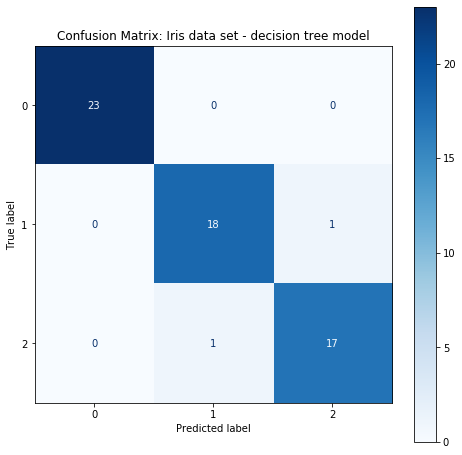

In [104]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8,8))

plot_confusion_matrix(dt_classifier, X_test, y_test, cmap=plt.cm.Blues, ax=ax)

ax.set_title('Confusion Matrix: Iris data set - decision tree model')


**Confustion Matrix Classification report**

- percision
- recall
- F1 score

In [106]:
y_pred = dt_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      0.95      0.95        19
           2       0.94      0.94      0.94        18

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

